# Módulo 10 atividade 1

#### <span style="color:green">  Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente. </span>

#### <span style="color:green"> Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados. </span>

#### <span style="color:green"> As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.</span>

#### Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.



###  <span style="color:blue"> 1º Vamos carregar o arquivo e fazer uma limpeza, tratar os missing values e se desfazer das variáveis e/ou colunas irrelevantes. </span>

In [218]:
# Carregando as bibliotecas relevantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
# Carregando e lendo o arquivo
df_original = pd.read_csv('previsao_de_renda.csv')
df_original.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [220]:
# Verificando a colunas presentes
df_original.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [221]:
# Criando um novo Dataframe com apenas as colunas relevantes (Sem 'Index', 'Unnamed', 'mau')
colunas_relevantes = ['data_ref', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda']

df_novo = df_original[colunas_relevantes]
df_novo.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


In [222]:
df_novo.dtypes

data_ref                  object
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [223]:
df_novo.describe()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.00000,12466.000000,15000.000000,15000.000000
mean,0.437267,43.84140,7.750462,2.219067,4624.632946
std,0.760594,11.22917,6.780216,0.922352,4628.571729
min,0.000000,22.00000,0.191781,1.000000,159.900000
25%,0.000000,34.00000,3.016438,2.000000,1945.740000
50%,0.000000,43.00000,6.016438,2.000000,3278.260000
75%,1.000000,53.00000,10.183562,3.000000,5642.365000
max,14.000000,68.00000,42.906849,15.000000,89918.040000


#### <span style="color:blue"> 1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [225]:
var_quant =['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
df_quantitativas = df_novo[var_quant]
df_quantitativas.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37


In [226]:
df_quantitativas.describe()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.00000,12466.000000,15000.000000,15000.000000
mean,0.437267,43.84140,7.750462,2.219067,4624.632946
std,0.760594,11.22917,6.780216,0.922352,4628.571729
min,0.000000,22.00000,0.191781,1.000000,159.900000
25%,0.000000,34.00000,3.016438,2.000000,1945.740000
50%,0.000000,43.00000,6.016438,2.000000,3278.260000
75%,1.000000,53.00000,10.183562,3.000000,5642.365000
max,14.000000,68.00000,42.906849,15.000000,89918.040000


##### <span style="color:green"> Podemos analisar que a ```média da renda``` é de ```R$ 4624,63```. Podemos notar também que a renda máxima chega ao valor de ```R$89.918```. A renda mínima porém é bem baixa com ```R$159,90```. 
##### <span style="color:red"> Com apenas essas informações, não podemos tirar nenhuma conclusão. Precisamos trabalhar mais os dados fornecidos. 

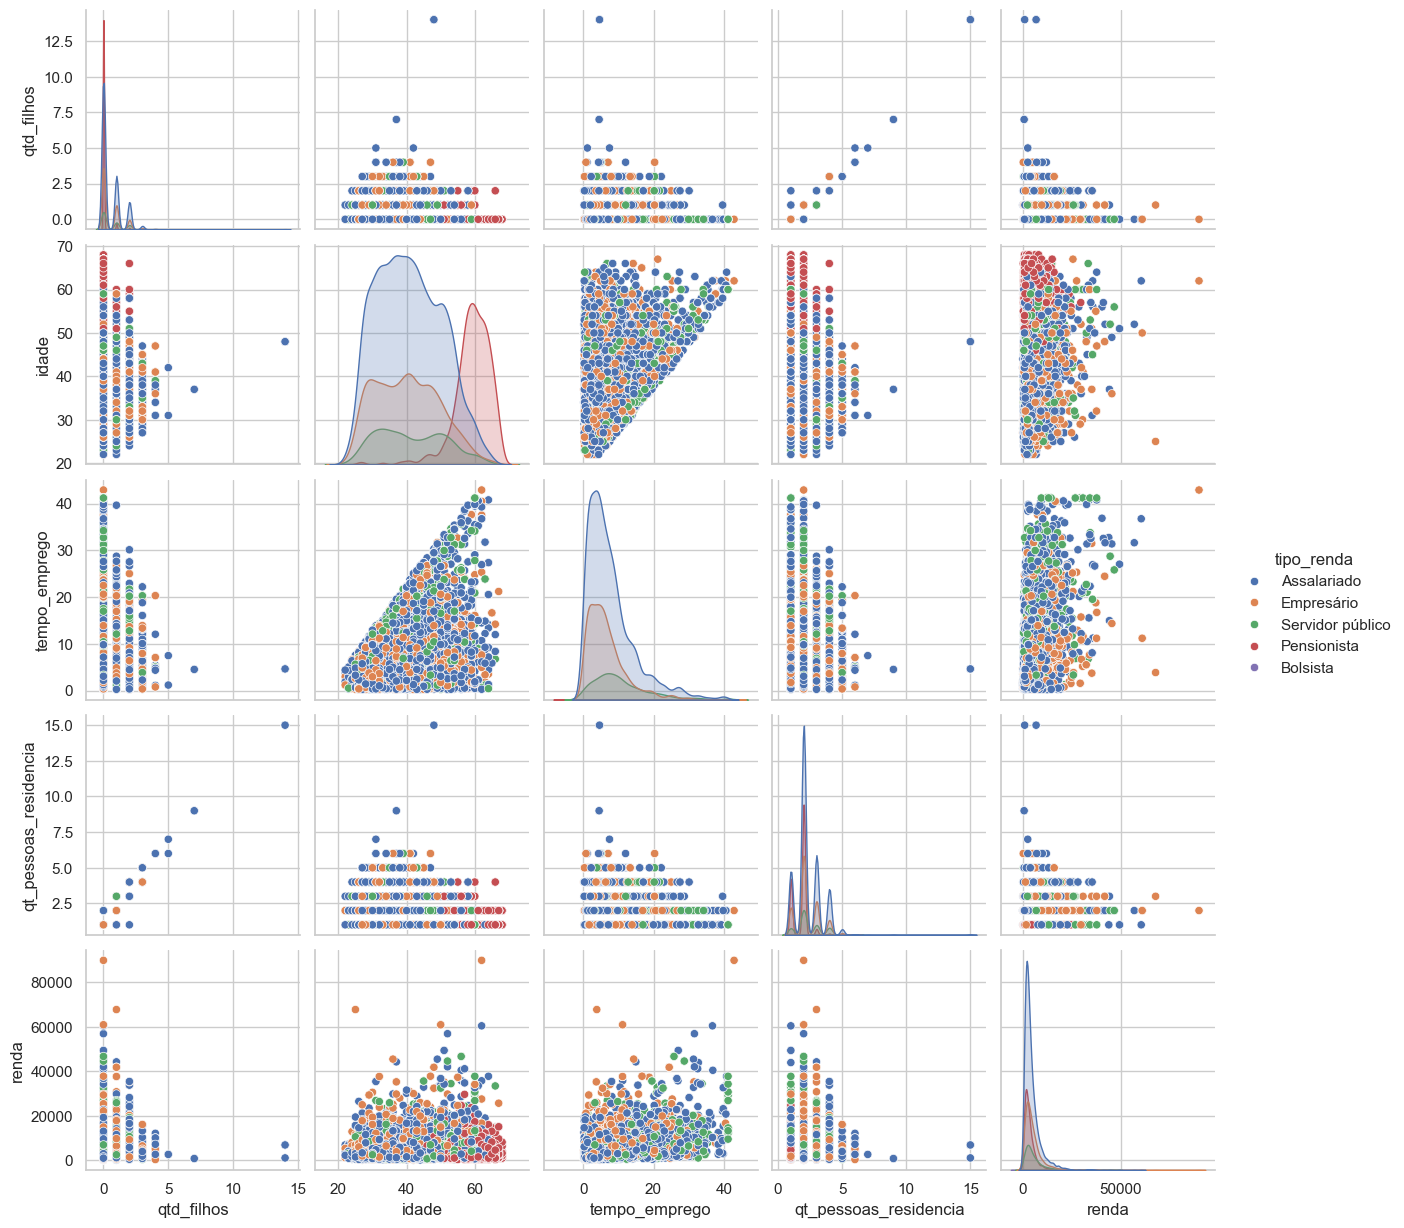

In [228]:
# Criando um gráfico de matriz de dispersão
sns.pairplot(data = df_novo, hue='tipo_renda', vars =var_quant )


In [229]:
# Calculando a matriz de correlações
matriz_corr = df_quantitativas.corr()
matriz_corr

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


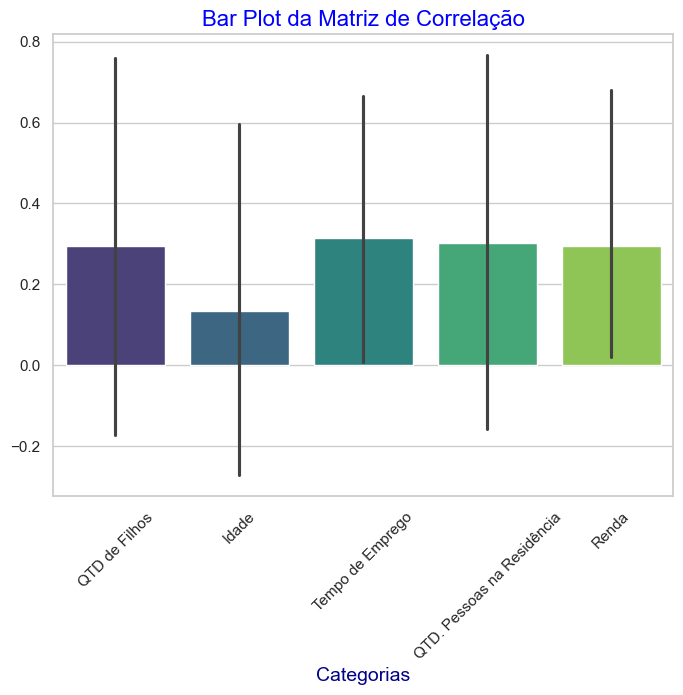

In [230]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(data=matriz_corr, palette="viridis")  # or use a specific color: color="skyblue"
plt.xlabel("Categorias", fontsize=14, color='darkblue')

new_labels = ['QTD de Filhos', 'Idade', 'Tempo de Emprego', 'QTD. Pessoas na Residência', 'Renda']
plt.xticks(rotation=45,ticks=range(len(new_labels)), labels=new_labels)
plt.title("Bar Plot da Matriz de Correlação", fontsize=16, color='blue')
plt.show()

<span style="color:red"> A presença de barras mais altas para algumas variáveis e barras mais baixas para outras pode indicar a possibilidade de que existam outliers em algumas variáveis 

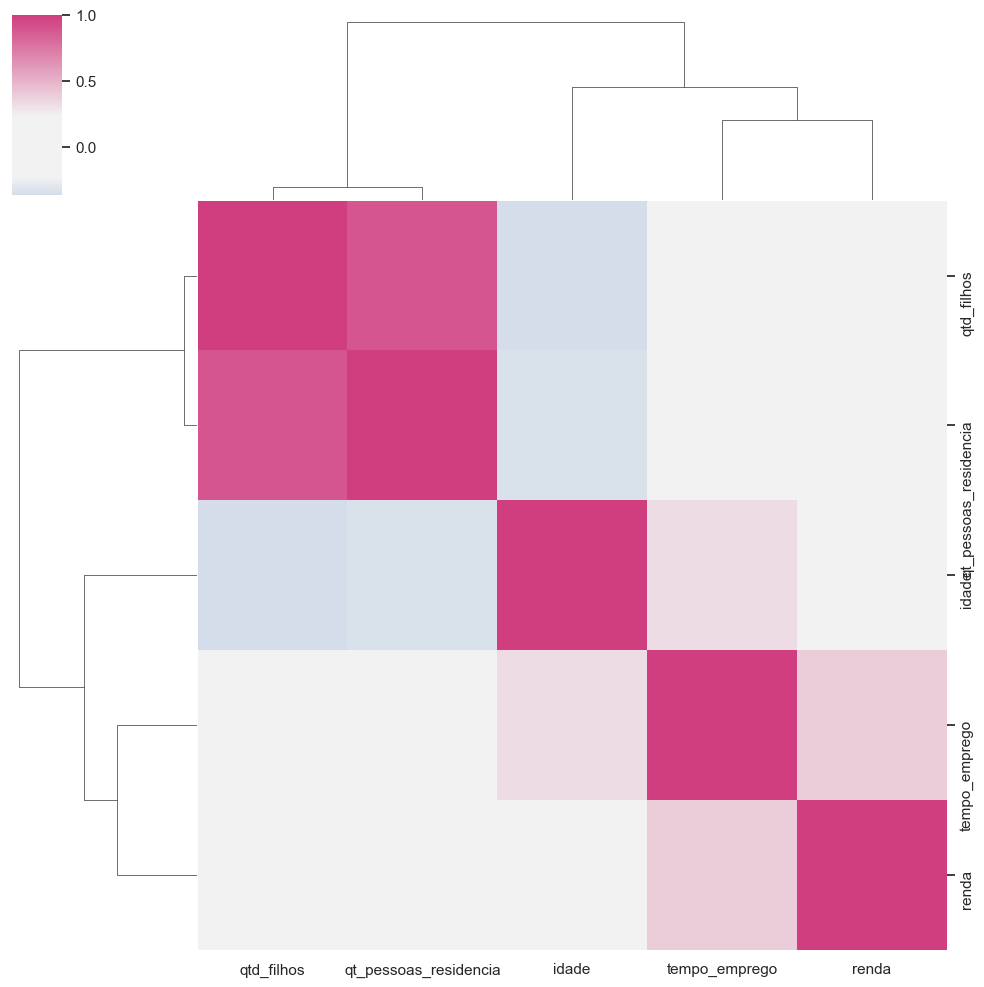

In [232]:
cmap = sns.diverging_palette(h_neg=250, h_pos=710, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df_quantitativas.corr(), figsize=(10, 10),  center = 0 , cmap=cmap)


<span style="color:red"> Podemos ver que idade e tempo_emprego estão próximas, o que sugere uma leve correlação positiva entre elas. Isso é esperado, pois, em geral, pessoas mais velhas tendem a ter mais tempo de emprego.


#### <span style="color:blue"> 2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

Text(0, 0.5, 'Renda')

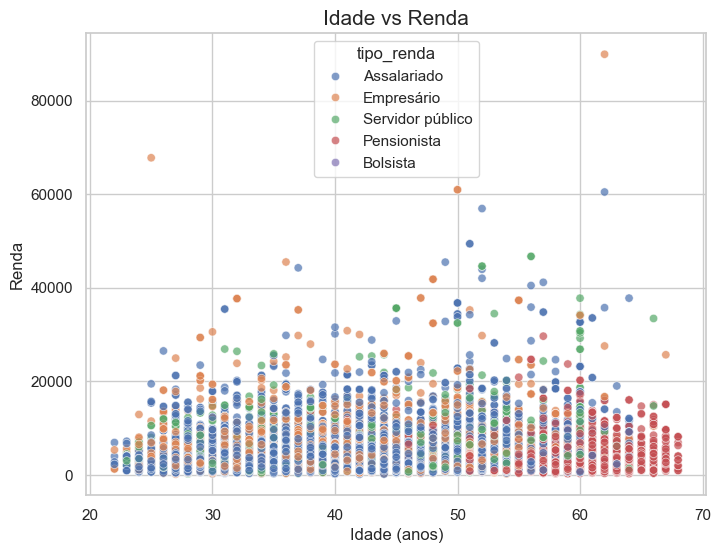

In [235]:
plt.figure(figsize=(8, 6))
plt.title('Idade vs Renda', size=15)
sns.scatterplot(data = df_novo, x=df_quantitativas['idade'], y=df_quantitativas['renda'], hue='tipo_renda',  alpha = 0.7);
plt.xlabel('Idade (anos)')
plt.ylabel('Renda')


<span style="color:red"> Podemos notar aqui que o gráfico representa bem os dados. Diferentes tipos de renda estão distribuídos de maneira diferente entre as idades. Por exemplo, os pensionistas são mais prevalentes em faixas etárias mais altas, enquanto os assalariados estão espalhados por uma faixa etária mais ampla.

Text(0, 0.5, 'Renda')

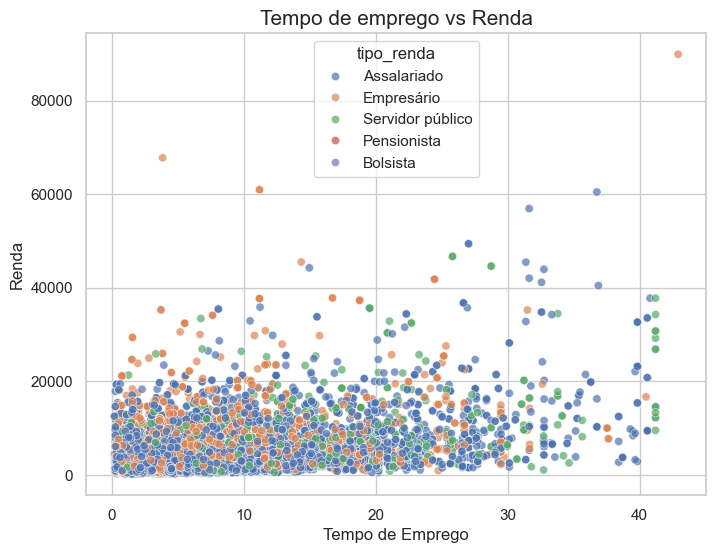

In [237]:
plt.figure(figsize=(8, 6))
plt.title('Tempo de emprego vs Renda', size=15)
sns.scatterplot(data = df_novo, x=df_quantitativas['tempo_emprego'], y=df_quantitativas['renda'], hue='tipo_renda',  alpha = 0.7);
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')


<span style="color:red"> Existem outliers, especialmente entre os empresários e servidores públicos, indicando que alguns indivíduos nessas categorias ganham significativamente mais do que a média.

#### <span style="color:blue"> 3) Na sua opinião, há outliers na variável renda?

#### <span style="color:red"> Como já mencionado acima, analisando os gráficos, podemos notar a presença de outliers em nosso conjunto de dados. 

#### <span style="color:blue"> 4) Calcule o logaritmo da variável renda e repita a sequência de análise

<Axes: xlabel='idade', ylabel='renda'>

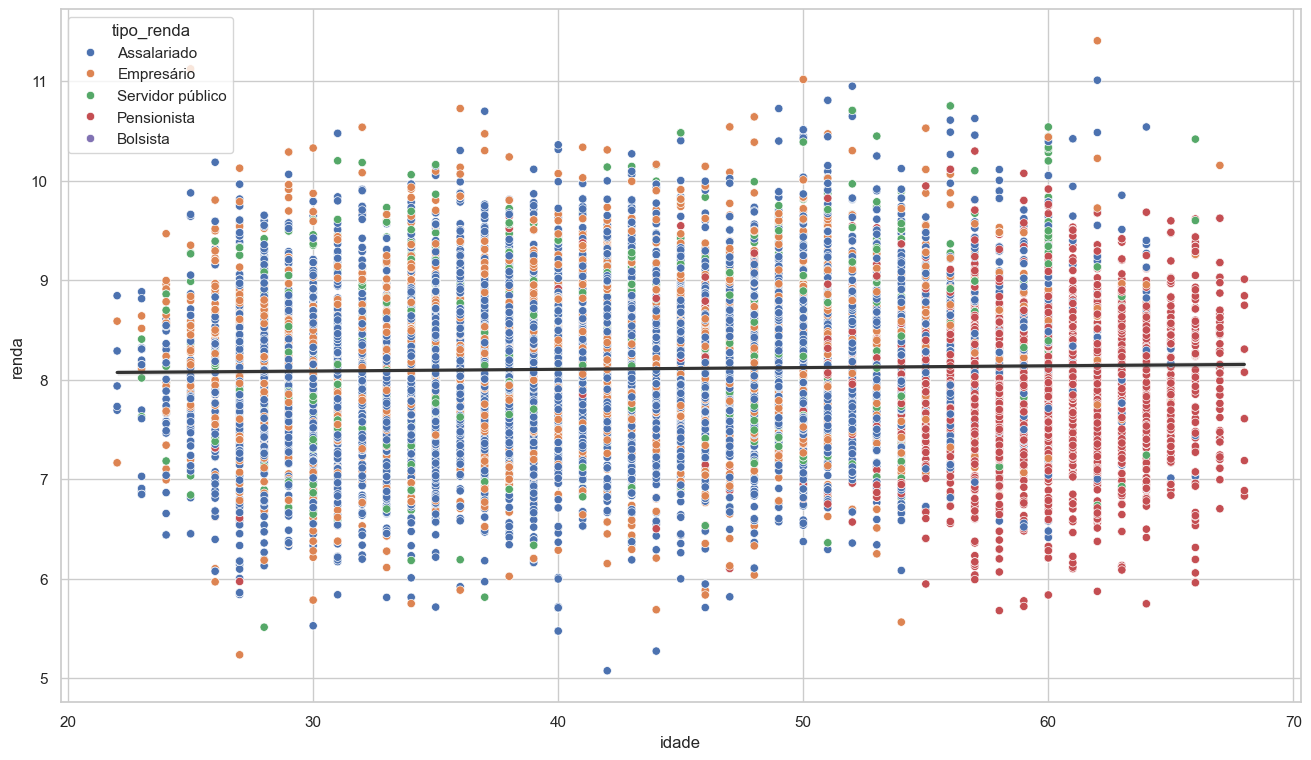

In [242]:
df_log = df_novo.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='idade', y='renda', hue='tipo_renda', data=df_log)

# Linha de tendência:
sns.regplot(x='idade', 
            y='renda', 
            data=df_log, 
            scatter=False, 
            color='.2')


<Axes: xlabel='tempo_emprego', ylabel='renda'>

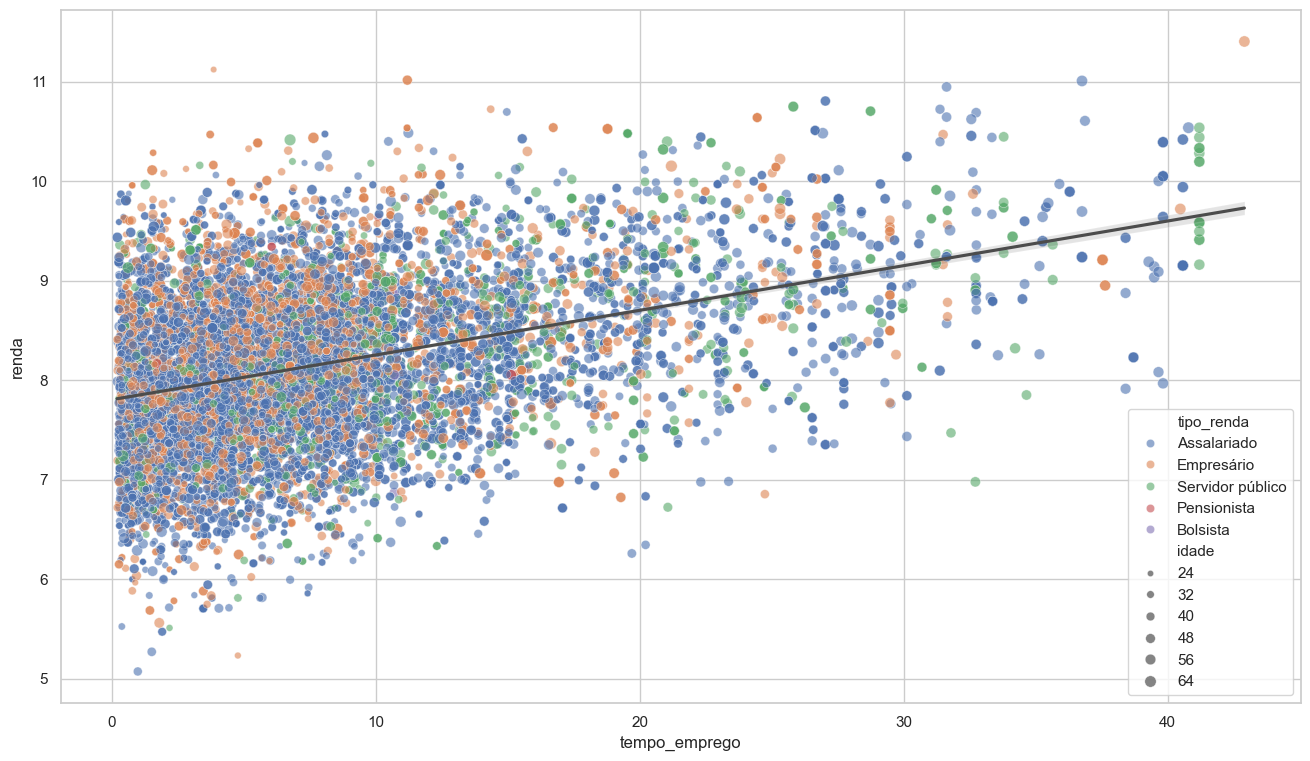

In [243]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='tempo_emprego',  y='renda', hue='tipo_renda', size='idade',  data=df_log, alpha=0.6)

# Linha de tendência:
sns.regplot(x='tempo_emprego', y='renda', data=df_log, scatter=False, color='.3')

#### <span style="color:blue"> 5) A aplicação do LOG você acha que melhorou ou piorou a análise?

#### <span style="color:red"> Sim, a aplicação do ```log``` melhorou a análise, pois ela apresentou os resultados sobre outra perspectiva. Podemos notar uma tendência positiva entre o tempo de emprego e a renda, em que, com o passar do tempo de emprego a renda tende a aumentar.